<a href="https://colab.research.google.com/github/oleeejka/Google-Colab/blob/main/my_neuro_class_two_groups_of_dots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch
from tqdm.auto import tqdm

In [ ]:
X, y = make_blobs(n_samples=1000, centers=[[-2, 0.5], [3, 0.5]], random_state= 42)

In [ ]:
colors = ('red', 'green')

In [ ]:
colored = []
for i in range(len(y)):
  if y[i] == 1:
    colored.append(colors[0])
  else:
    colored.append(colors[1])

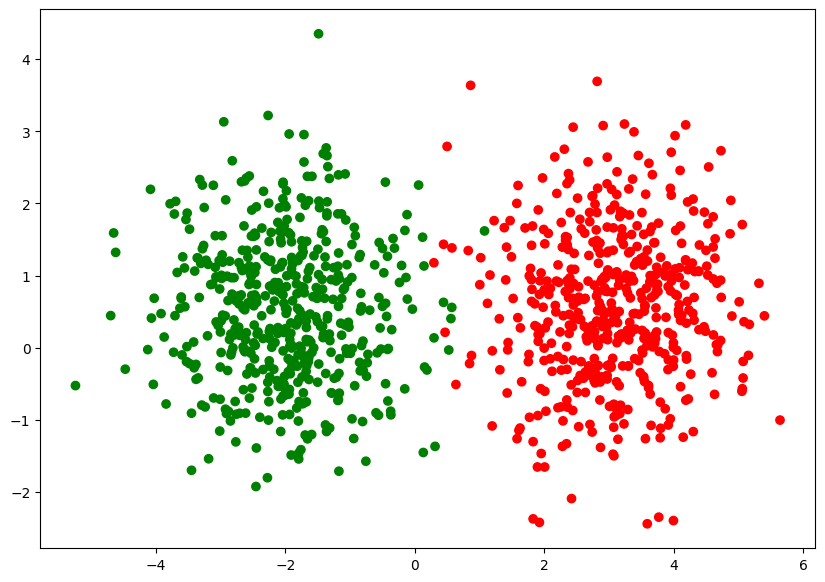

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=colored)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Определяем модель в виде класса

In [ ]:
class Net(nn.Module):
  def __init__(self) -> None:
    super().__init__()

    self.fc1 = nn.Linear(2, 5)
    self.act1 = nn.Sigmoid()

    self.fc2 = nn.Linear(5, 1)
    self.act2 = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)

    x = self.fc2(x)
    x = self.act2(x)

    return x

Обязательно преобразуем данные в тензоры

In [ ]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)

Специальный класс Dataloader помогает разделить выборку на мини-батчи и подавать их в сеть

In [ ]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

In [ ]:
losses = []

Функция для обучения сети

In [ ]:
def train(model, loader, criterion, optimizer, num_epoch):
  global losses
  for t in tqdm(range(num_epoch)):
    epoch_loss = []

    for X_batch, y_batch in loader:
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      epoch_loss.append(loss.item())

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    print("curr_loss", np.mean(epoch_loss))
    losses.append(np.mean(epoch_loss))
  return model

Определяем модель и параметры для обучения (функцию ошибок и оптимизатор)

In [ ]:
model = Net()

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Собственно обучение

In [ ]:
model = train(model, train_loader, criterion, optimizer, 500)

  0%|          | 0/500 [00:00<?, ?it/s]

curr_loss 0.923570976807521
curr_loss 0.9097995024461013
curr_loss 0.8959757273013775
curr_loss 0.8825487540318415
curr_loss 0.869443769638355
curr_loss 0.8572996029487023
curr_loss 0.8452482498609103
curr_loss 0.8353700179320115
curr_loss 0.8238540796133188
curr_loss 0.8123258214730483
curr_loss 0.8024697166222793
curr_loss 0.7917586289919339
curr_loss 0.781889585348276
curr_loss 0.7725412341264578
curr_loss 0.7641958410923297
curr_loss 0.754972191957327
curr_loss 0.7461038094300491
curr_loss 0.7370128677441523
curr_loss 0.7294703263502854
curr_loss 0.7206909885773292
curr_loss 0.7125404110321631
curr_loss 0.7051615531627948
curr_loss 0.6973415521474985
curr_loss 0.6898276760027959
curr_loss 0.6820761423844558
curr_loss 0.6752384855197027
curr_loss 0.6685181214259222
curr_loss 0.6617269515991211
curr_loss 0.6550178069334763
curr_loss 0.6480723986258874
curr_loss 0.6424182745126578
curr_loss 0.6359318357247573
curr_loss 0.6303669443497291
curr_loss 0.6241809725761414
curr_loss 0.618478

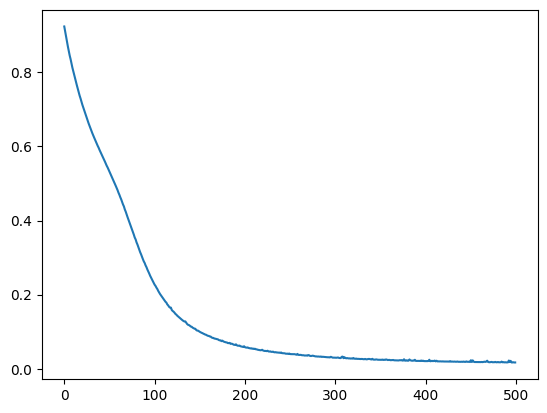

In [ ]:
plt.plot(losses)

Получаем предсказание модели

In [ ]:
with torch.no_grad():
  prediction = model(torch.FloatTensor(X_test))
  prediction = prediction.tolist()

prediction = np.array([int(x[0] > 0.5) for x in prediction])

Визуализируем предсказание на тестовой выборке

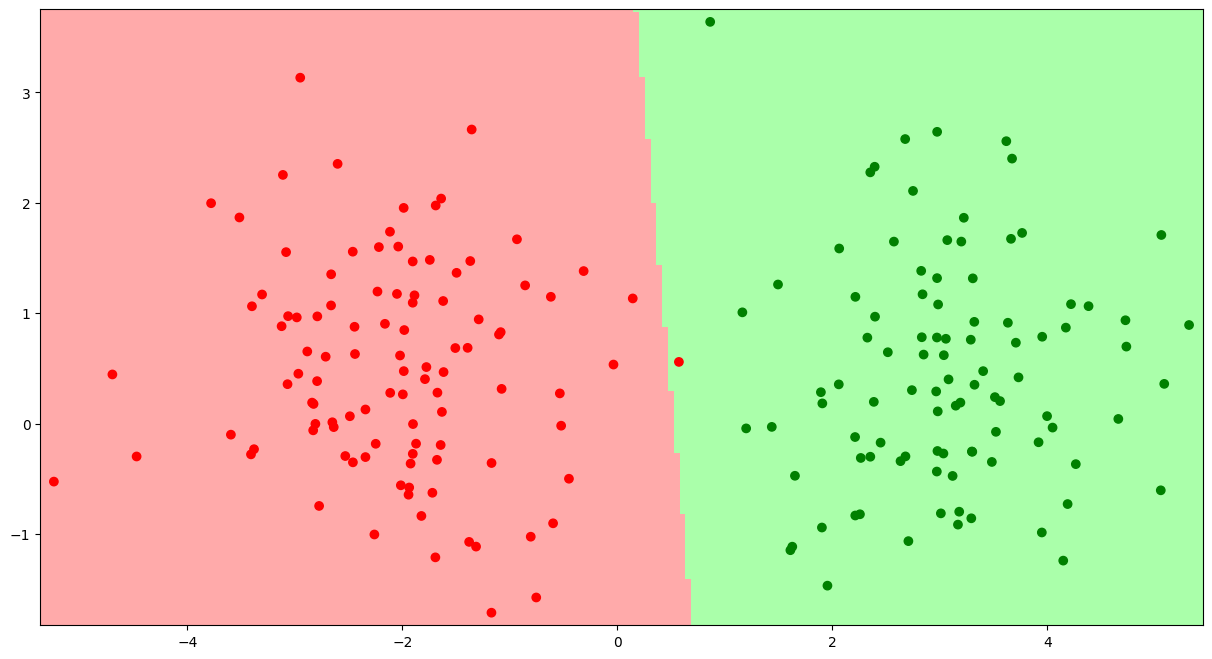

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);